# SMS Spam Detection

Email Spam Detection also works in the same way.

Also, it is a classification Problem, since the o/p can be either 'spam' or 'not spam'.

In [119]:
import numpy as np
import pandas as pd

In [120]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [121]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2078,spam,85233 FREE>Ringtone!Reply REAL,NaN,NaN,NaN
2989,ham,"Love isn't a decision, it's a feeling. If we c...",NaN,NaN,NaN
4952,ham,I lost 4 pounds since my doc visit last week w...,NaN,NaN,NaN
4158,ham,Now got tv 2 watch meh? U no work today?,NaN,NaN,NaN
3576,ham,Yeah confirmed for you staying at that weekend,NaN,NaN,NaN


In [122]:
df.shape

(5572, 5)

In [123]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## Data Cleaning

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Since, the last 3 columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) contains many missing values, therefore we will dro this 3 columns.

In [125]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)        # inplace=True means we want this change permanently

In [126]:
df.sample(5)

,v1,v2
2594,ham,"ThatÛ÷s the thing with apes, u can fight to t..."
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...
3340,ham,Still i have not checked it da. . .
3711,ham,Wat u doing there?
3191,ham,Is ur paper today in e morn or aft?


In [127]:
# Renaming the cols name using dictionary:

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1984,spam,Urgent! Please call 09061743810 from landline....
921,ham,On ma way to school. Can you pls send me ashle...
4483,ham,Shopping? Eh ger i toking abt syd leh...Haha
5125,ham,After my work ah... Den 6 plus lor... U workin...
596,ham,Gud mrng dear have a nice day


### LabelEncoding

Since, it is a classification Problem, as the o/p can be either 'spam' or 'not spam'.

And in our case, the target col either contains 'ham' or 'spam', therefore putting the labels as 0 (for ham) and 1 (for spam) using LabelEncoder.

In [128]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [129]:
df['target'] = encoder.fit_transform(df['target'])

In [130]:
df['target'][2775]                          # [2775] shows the index value

0

Means not spam.

In [131]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Missing Values

In [132]:
# checking missing values

df.isnull().sum()

target    0
text      0
dtype: int64

Means there is no missing values.

### Duplicate Values

In [133]:
# check for duplicate values

df.duplicated().sum()

403

Means there are 403 duplicate values that we need to remove.

In [134]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [135]:
df.duplicated().sum()

0

In [136]:
df.shape

(5169, 2)

## Exploratory Data Analysis(EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is done to have a better understanding of data.

In [137]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [138]:
# lets check how many are spam sms:

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Thereofore, thereare 653 spam sms in our dataset.

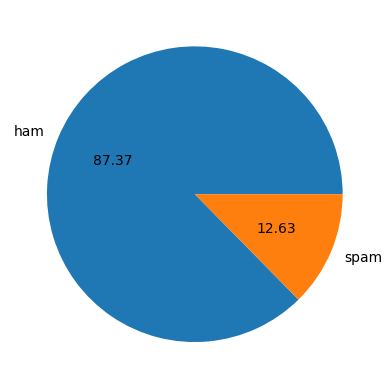

In [139]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")              # autopct="%0.2f : to have % values upto 2 decimal places.
plt.show()

Data is imbalanced since the spam % is very less compared to ham.

### nltk module

Now we will see that how many alphabets (or characters), words, and sentences being used in our sms.

This is done using nltk module (Natural Language Toolkit).

In [140]:
import nltk

In [141]:
!pip install nltk

In [142]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### counting the num of characters in each sms

In [143]:
df['num_characters'] = df['text'].apply(len)

In [144]:
df['num_characters'].head()

# it will print the length of each sms.

0    111
1     29
2    155
3     49
4     61
Name: num_characters, dtype: int64

In [145]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### fetching the num of words in each sms

In [146]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [147]:
# fetching the num of words in each sms i.e., calculating the length of words:

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# In x:len(nltk.word_tokenize(x)), x means the moment, it get any text/sms (x), it will break the sms on the basis of words.
# nltk.word_tokenize(x) means we are breaking each sms on the basis of words and calculating it's length which gives the total no. of words in a sentances.

In [148]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


#### fetching the num of sentences in each sms

In [149]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [150]:
# fetching the num of sentances in each sms i.e., calculating the length of sentances:

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [151]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Describing the created data

In [152]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [153]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [154]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### Conclusion

If we observe the mean for ham ad spam sms then we can conclude that spam sms are bit longer than ham sms.

### Histograms

In [155]:
import seaborn as sns

#### w.r.t. num of characters

<Axes: xlabel='num_characters', ylabel='Count'>

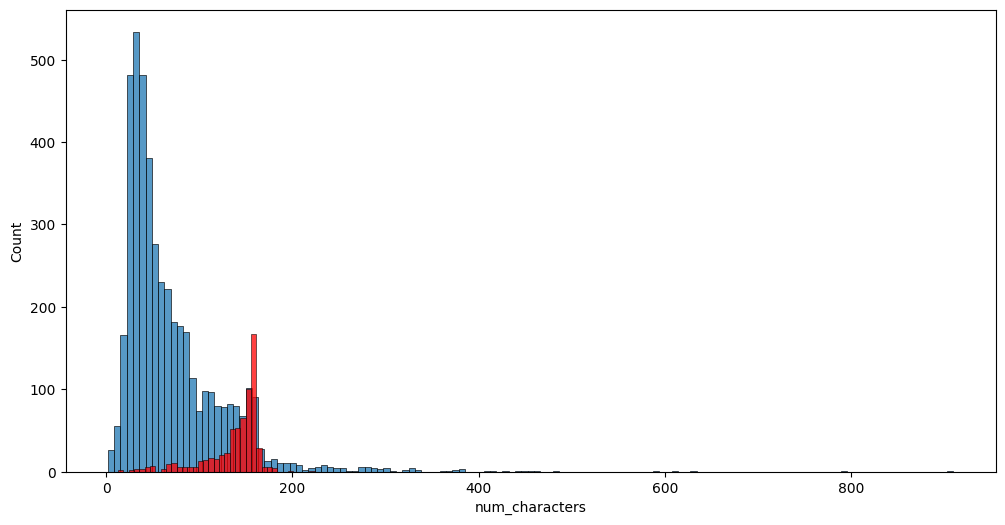

In [156]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])           # extracting ham sms
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')      # extracting spam sms

<Axes: xlabel='num_characters', ylabel='Count'>

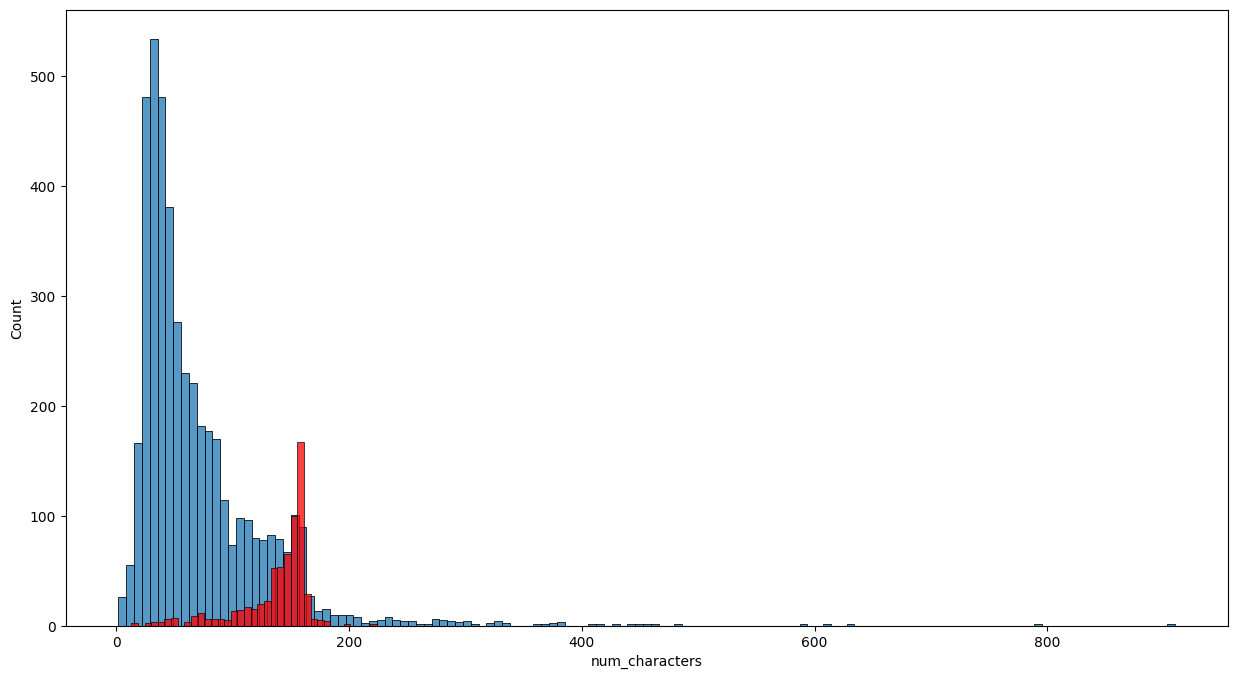

In [157]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target'] == 0]['num_characters'])           # extracting ham sms
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')      # extracting spam sms

So we can observe that the num of characters in spam sms are higher than ham sms.

Means most of the spam sms (frequency) are made with large num of characters while most of the ham sms are made with small num of characters. Although we can see some outliers as well.

#### w.r.t. num of words

<Axes: xlabel='num_words', ylabel='Count'>

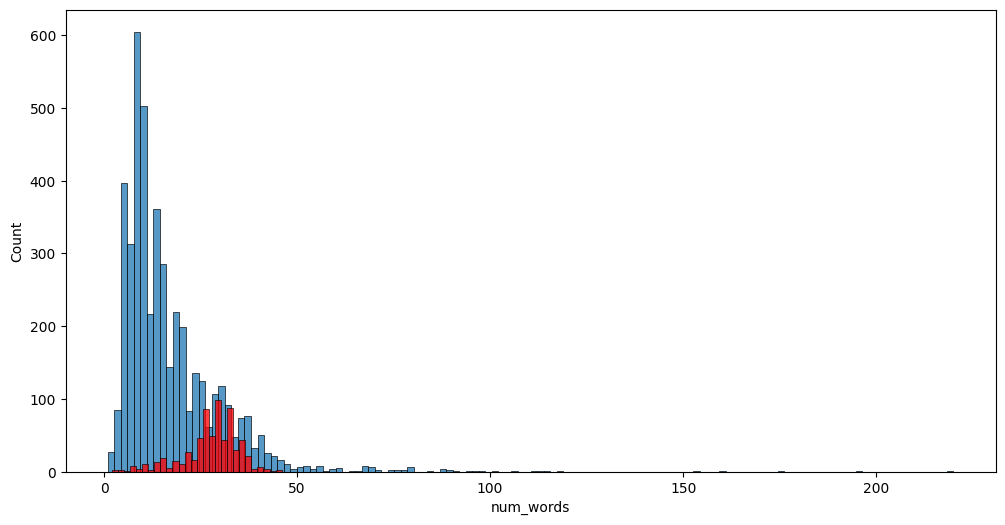

In [158]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

Same observation in case of num of words.

Means most of the spam sms (frequency) are made with large num of words while most of the ham sms are made with small num of words.

Although we can see some outliers as well.

#### w.r.t. num of sentences

<Axes: xlabel='num_sentences', ylabel='Count'>

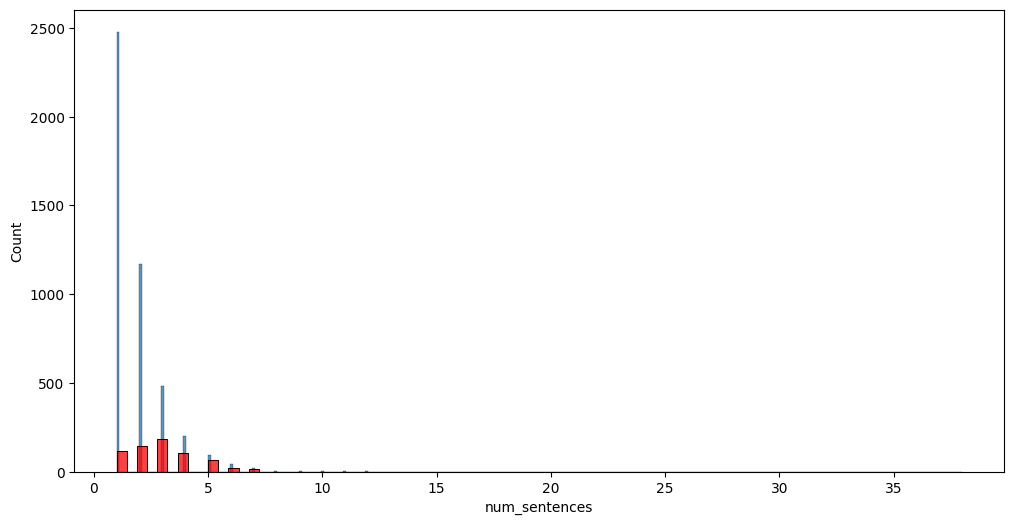

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

We got the similar trends as that in characters and words.

### Pair Plot

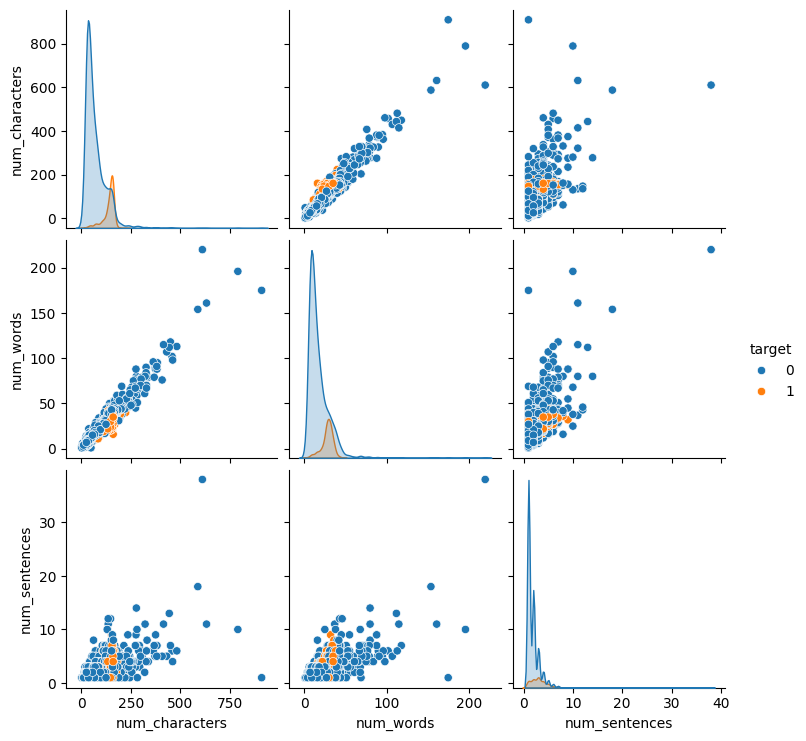

In [160]:
sns.pairplot(df,hue='target')

We can observe the outliers in our data.

### Heat Map

In [161]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [162]:
# we need to drop text col since we want to see the correlation metrics and it requires thye numerical values but text col contains string:

df1 = df.drop(columns='text')

In [163]:
df1.head()

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


In [164]:
df1.corr()           # correlation Coefficients: value close to 1 means 2 variables are dependent and reverse for value close to 0.

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

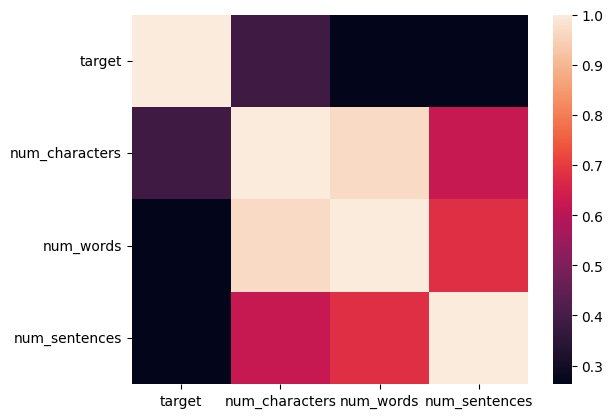

In [165]:
sns.heatmap(df1.corr())

<Axes: >

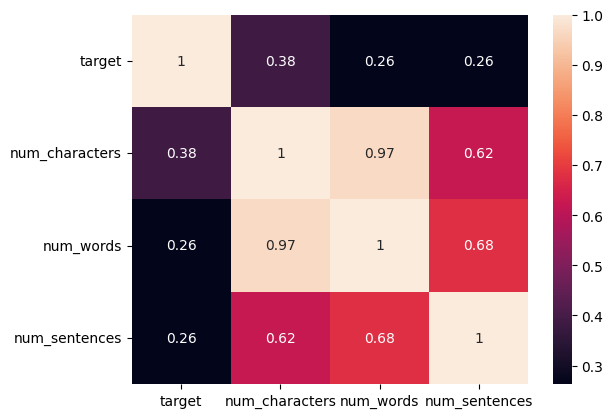

In [166]:
sns.heatmap(df1.corr(),annot=True)             # annot=True : means annotation = True and now it will print the values as well.

So we can see the strong correlation among 3 columns (num_character, num_words, num_sentences), therefore, we can select only one out of this m columns.

Also, among this 3 columns, we will choose num_characters col, since the correlation coefficient value of num_characters col with target is higher.

## Data Preprocessing


Now we will see that what are the most frequent words used in ham and spam sms.

Steps for data preprocessing:

1. **Converting into lower case**
2. **Tokenization** (breaking the sentences into words)
3. **Removing special characters** (+, *, -, !, etc)
4. **Removing stop words and punctuation marks** (generally english stop words : are, on, of, and, etc)
5. **Stemming** (means converting the similar types of words into one word, eg: converting {loving, loved, love} into {love})



A special character on your keyboard is a symbol that is not considered a number or letter.

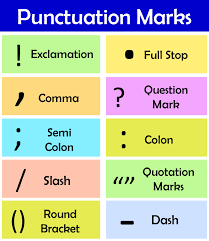

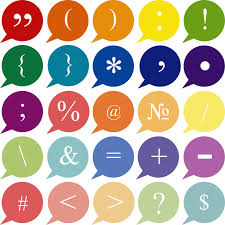

### What are stopwords?

Words that are often used in the sentences which does not contribute in the meaning of the sentences.

In [167]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [168]:
from nltk.corpus import stopwords

# let see all the stopwords:

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### What are punctuation marks?

In [173]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Alphanumeric Characters

Alphanumeric characters include both upper and lower case letters (A to Z, a to z) and numerals (0 to 9).



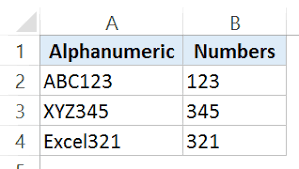

### Stemming

In [174]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()                         # Initialize the PorterStemmer

In [175]:
ps.stem('dancing', 'dance')

'danc'

In [176]:
ps.stem('loving','love','loved')

TypeError: PorterStemmer.stem() takes from 2 to 3 positional arguments but 4 were given

In [177]:
# Stem each word individually
word1 = ps.stem('loving')
word2 = ps.stem('love')
word3 = ps.stem('loved')

print(word1, word2, word3)  # Output: love love love

love love love


### Defining our own fn

In [178]:
def transform_text(text):
    text = text.lower()                           # converting lower case
    text = nltk.word_tokenize(text)               # words tokenization


# removing special characters (eg: %, $, #, etc) using alnum:

    y = []                                        # empty list
    for i in text:
        if i.isalnum():                            # alnum means alphanumeric (containing both no.s and letters, eg: 1980s)
            y.append(i)                            # appending (adding in the list y)


# removing stopwords and punctuation marks:

    text = y[:]                                   # assigning y to text
    y.clear()                                     # clearing y (means list y is again empty)

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)                            # appending (adding in the empty list y)


# Stemming:

    text = y[:]                                   # again assigning y to text
    y.clear()                                     # clearing y (means list y is again empty)

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)                           # join (whatever inside the y) and returning the list y in string form

In [179]:
# let see how it's working:


df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [180]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [181]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [182]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Therefore, we converted the text into lower case and we removed the special characters, stopwords, and punctuation marks.

In [183]:
df['transformed_text'] = df['text'].apply(transform_text)

In [184]:
df['transformed_text'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: transformed_text, dtype: object

From now we will work with transformed_text col (and not with text col).

In [185]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### WordCloud

Using WordCloud, we will see what are the most frequent words used in ham sms and spam sms.

WordCloud will enlarge those words which are which are used mostly.

In [186]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')             # this are image parameters

In [187]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))          # df['target'] == 1 means applying WordCloud only on spam sms

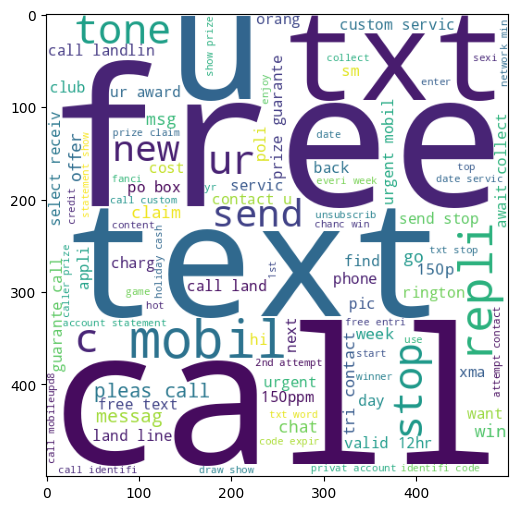

In [188]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

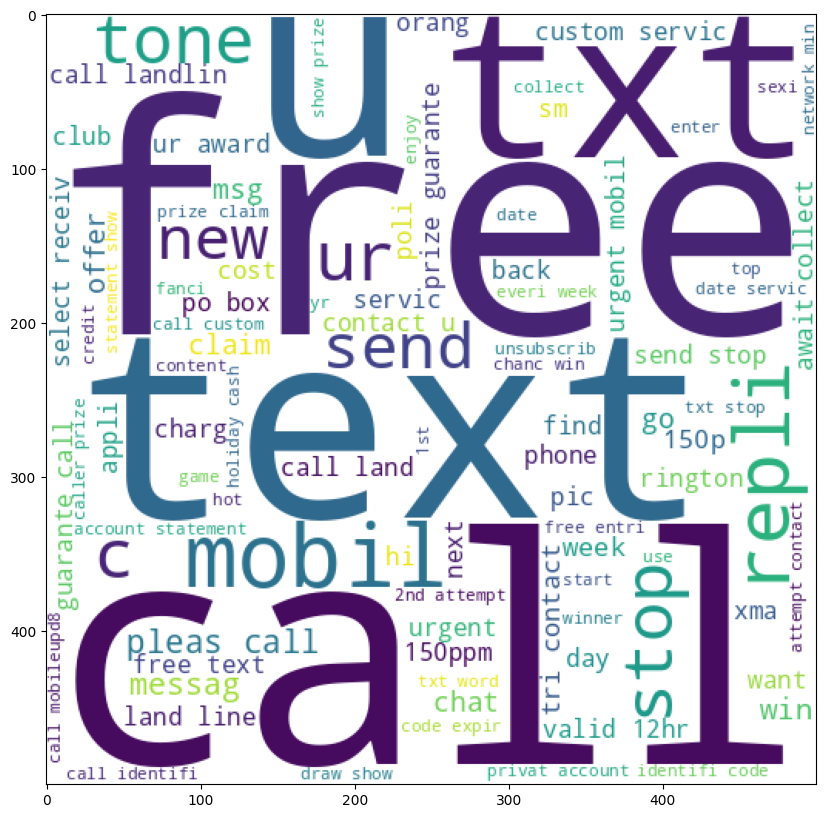

In [189]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

And we generally gets this type of words only in spam sms like :- call, free, etc.

In [190]:
# Applying the WordCloud on ham sms:

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

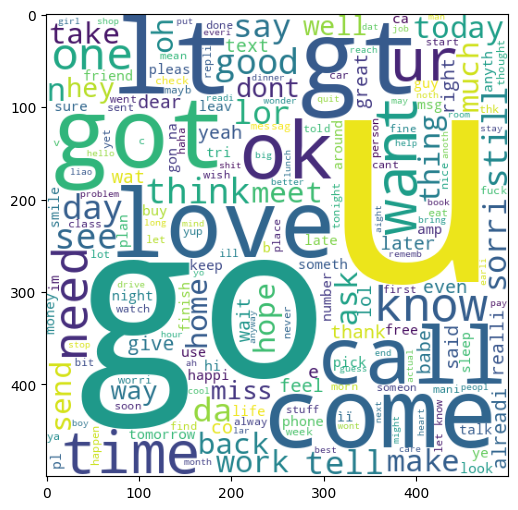

In [191]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### Top 30 most frequent words in ham and spam sms

In [192]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Splitting the transformed_text col into words

In [193]:
df[df['target'] == 1]['transformed_text']             # printing only transformed_text col of only spam sms

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [194]:
# list of strings:

df[df['target'] == 1]['transformed_text'].tolist()          # converting it to one large list where each sms (each row) represents one item of that list.

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [195]:
# printing all the items of list (means printing all the sms one by one):

for msg in df[df['target'] == 1]['transformed_text'].tolist():
  print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [213]:
# now we need to split all the words (for counting):

spam_corpus = []                                                    # creating a empty list
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [214]:
#spam_corpus.head()

we got error as it is a list.

In [215]:
# To print the first 5 items of the spam_corpus list:
print(spam_corpus[:5])

['free', 'entri', '2', 'wkli', 'comp']


In [216]:
len(spam_corpus)

9939

Means there are total 9939 spam words.

#### Counter Module

It will convert the list into a dictionary where 'key' represents a word whereas 'pair' represents it's total count in the spam sms.

In [217]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

Let see the 30 most frequent words in spam sms:

In [218]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [219]:
# creating a dataframe:

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [228]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

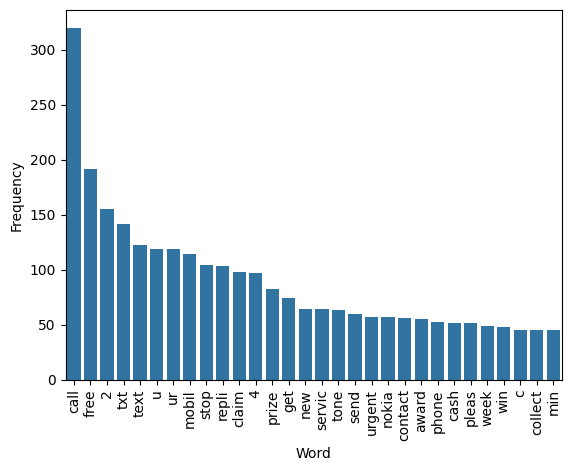

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Create a dataframe from the counter
df2 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the dataframe columns in the barplot function
sns.barplot(x='Word', y='Frequency', data=df2)
plt.xticks(rotation='vertical')
plt.show()

In [229]:
df2.head()

,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [230]:
# similarly we will do for ham sms:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [231]:
len(ham_corpus)

35404

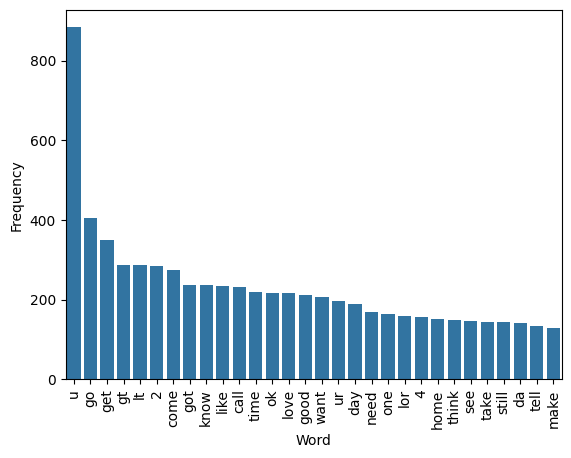

In [233]:
# Create a dataframe from the counter
df3 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use the dataframe columns in the barplot function
sns.barplot(x='Word', y='Frequency', data=df3)
plt.xticks(rotation='vertical')
plt.show()

In [234]:
df3.head()

,Word,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


## Model Building

We start with Neive Bayes (NB) Models (such as GaussianNB, MultinomialNB, BernoulliNB) because it has been said that NB models works well with textual data, and later on we will compare it with different models.

Since the target col is numerical but the transformed_text col is text (string) so we need to 1st convert it into a numerical col.

For this, we perform text vectorization. using Bag of words.

In [330]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [344]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()                      # for Bags of Words
#tfidf = TfidfVectorizer(max_features=3000)                                                 # 1st way (tune max_feature) to improve the performance of different models (in Model Improvement)

max_features tells that how many most frequent words you want to consider.

For X(shape) = 6708 columns means we are considering all the 6708 words.

If max_feature = 3000 means we are considering only the initial 3000 most frequent words.

In [239]:
X = cv.fit_transform(df['transformed_text']).toarray()          # X = i/p

In [345]:
#from sklearn.preprocessing import MinMaxScaler                                            # 2nd way to improve the performance of different models (in Model Improvement)
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [346]:
# appending (adding) the num_character col to X                                            # 3rd way to improve the performance of different models (in Model Improvement)
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [243]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [339]:
X.shape

(5169, 6708)

Shows 5169 rows and 6708 columns where each col reperesents a particular word whereas each row represents a particular sms.

Or we can say that we have a total of 6708 different words.

In [340]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

Since, if we use bag of words technique (for text vectorization), the algorithm will make one col for each words (out of total words present in the transformed_text col) and the value in this column for each row shows the total number of times a particular word occurs in the sms.

Eg: since each row represents a particular sms and if we consider 1st row which will be having a particular sms, then X[0] contains 6708 columns and each col represents a particular word and the value corresponding to that at that col indicates the no. of times that word came.

So 0 means that word didn't came in that sms.

In [246]:
y = df['target'].values                    # y = o/p

In [247]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [331]:
y.shape

(5169,)

Shows 5169 rows and 1 colmun (which is our target column).

In [248]:
from sklearn.model_selection import train_test_split

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# 0.2 means 20% data we are giving to X_test and 80% data to X_train

In [343]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [341]:
X_train.shape

(4135, 6708)

### Neive Bayes Models

#### CountVectorizer Technique (or Bags of Words)

We are using all the 3 NB i.e., GaussianNB, MultinomialNB, and BernoulliNB because we don't know the type of distribution of our data.

In [251]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [252]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [254]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
y_pred1

array([0, 1, 1, ..., 0, 0, 0])

In [255]:
print(accuracy_score(y_test,y_pred1))

0.8800773694390716


In [256]:
print(confusion_matrix(y_test,y_pred1))

[[792 104]
 [ 20 118]]


In [257]:
print(precision_score(y_test,y_pred1))

0.5315315315315315


In [258]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [259]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Therefore we got the highest accuracy (97%) for BernoulliNB model.

In this model, confusion matrix and precision score becomes more imp parameter than accuracy since the **data is imbalance** so higher precision score is required because we don't want any wrong pridiction (means we want **false positive** to be very less) i.e., we don't want any imp sms predicted to be spam sms.

False +ve in mnb is 25, whereas it is only 3 in bnb.

Therefore we will go with bernoulliNB model.

#### tfidf vectorization technique

Using 'tfidf technique' instead of using cv = CountVectorizer(Bags of Words) for text vectorization.

In [298]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)            # max_features=3000 means we are considering only initials 3000 most frequent words

In [299]:
X = cv.fit_transform(df['transformed_text']).toarray()          # X = i/p

In [300]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [301]:
X.shape

(5169, 6708)

In [302]:
y = df['target'].values                    # y = o/p

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [305]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [306]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [307]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [308]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Other Models

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [310]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [311]:
# making a dictionary:

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [312]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [313]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [314]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9154929577464789
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [315]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [316]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.991379
10,xgb,0.973888,0.966387
5,RF,0.971954,1.000000
4,LR,0.970986,0.973684
2,NB,0.964217,0.834437
6,AdaBoost,0.963250,0.946429
7,BgC,0.962282,0.915966
9,GBDT,0.943907,0.944444
0,SVC,0.926499,0.742188
3,DT,0.923598,0.915493


Above table is sorted on the basis of Accuracy (in ascending order).

So max accuracy we are getting for ETC (extra Tree Classifier, a variation of random forest).

However, highest accuracy we are getting for NB and KNN.

Lets sort on the basis of Precision

In [317]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [318]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
7,BgC,0.962282,0.915966
3,DT,0.923598,0.915493
2,NB,0.964217,0.834437


Since in our case, precision is more imp than accuracy, therefore, we will choose ETC or RF since precision is close to 1 and accuracy is also high.


In [319]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [320]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,BgC,Accuracy,0.962282
8,DT,Accuracy,0.923598
9,NB,Accuracy,0.964217


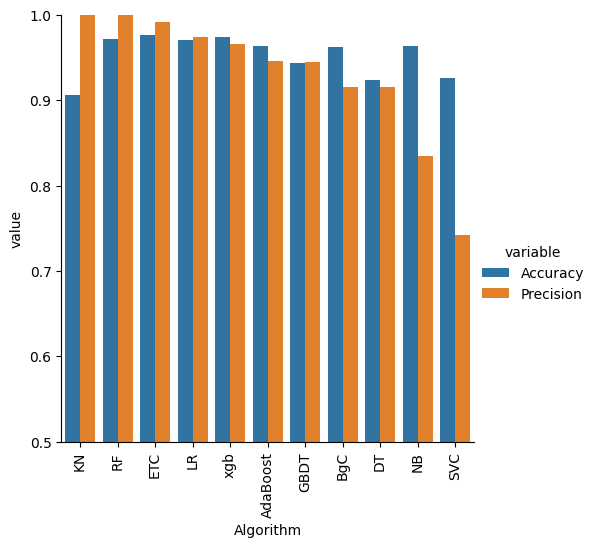

In [321]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model Improvement

In [322]:
# Certain ways to improve the model's performance:

# 1. Change the max_features parameter of TfIdf
# 2. Can do scaling (let using MinMaxScaler) in X and check the performance of different models
#               (don't use standard sclaing method because it gives -ve values as well but NB algorithm does not works for -ve values of X)
# 3. Since we created 3 features (column) i.e., num of characters, num of words, and num of sentences.
#    So now along with X = 6708 i/p columns (i.e., 6708 words), now we will add this 3 columns as well and we will compare the performance of different models.
#    We can either add all the 3 cols (then X = 6711 i/p cols) or we can add only one col at a time (X = 6708(old cols) + 1(new col) = 6709 i/p cols) and compare the performance of different models.

In [323]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [324]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [325]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [326]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [327]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [328]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
8,DT,0.923598,0.915493,0.923598,0.915493,0.923598,0.915493,0.923598,0.915493
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


#### Conclusion Table

The above table shows the accuracy and precision scores for different models with different improvements.

### Voting Classifier

We will make a voting classifier model which will be the combination of our best performing models (on the basis of precision (as primary criteria) and accuracy (as secondary criteria) i.e., RF, ETC, LR, etc)

In [347]:
# Voting Classifier (using svc, mnb, and etc as our 3 base models):


svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [348]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [349]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [350]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


### Stacking

In [351]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [352]:
from sklearn.ensemble import StackingClassifier

In [353]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [354]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9765625


In [355]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))